In [2]:
import matplotlib.pyplot as plt
import pickle as pkl

## 5 minutes left, down 3-1

Results calculated on slurm servers using the brute force model. 24 hour time limit was hit, so we stopped calculating after a pull time of 110 seconds

'Pull the goalie after 2 seconds for the highest probability of success'

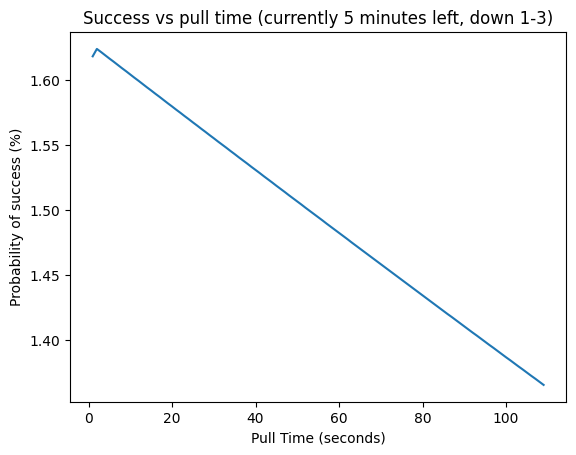

In [13]:
decisions_df = pkl.load(
    open(
        "results/partial_results_5min_1to3_brute_force.pkl",
        "rb",
    )
)

# Plot pull time vs probability of success
plt.plot(decisions_df["pull_time"], decisions_df["prob_success"])
# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title("Success vs pull time (currently 5 minutes left, down 1-3)")

# Find the pull time with the highest probability
max_prob = decisions_df["prob_success"].max()
best_pull_time = decisions_df[decisions_df["prob_success"] == max_prob]["pull_time"].values[0]
display(f"Pull the goalie after {best_pull_time} seconds for the highest probability of success")

Text(0.5, 1.0, 'Compute time vs pull time considered (currently 5 minutes left, down 1-3)')

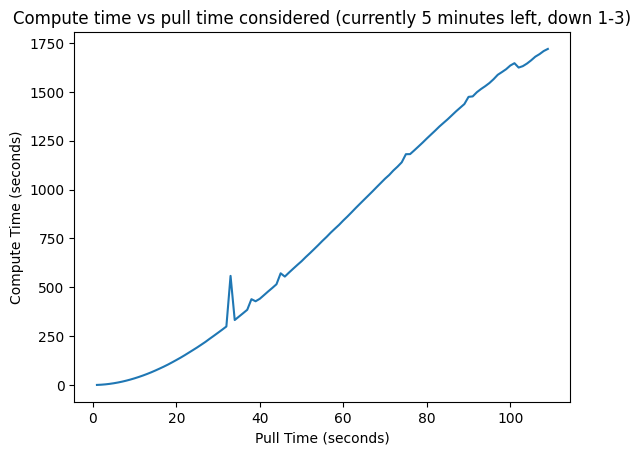

In [5]:
# Plot compute time for each decision
plt.plot(decisions_df["pull_time"], decisions_df["compute_time"])
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Compute Time (seconds)")
plt.title("Compute time vs pull time considered (currently 5 minutes left, down 1-3)")

## 6 minutes left, down 1-3

'Pull the goalie after 2 seconds for the highest probability of success'

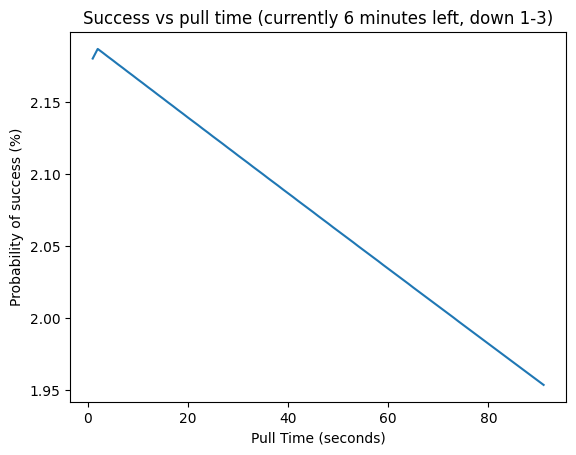

In [14]:
decisions_df = pkl.load(
    open(
        "results/partial_results_6min_1to3_brute_force.pkl",
        "rb",
    )
)

# Plot pull time vs probability of success
plt.plot(decisions_df["pull_time"], decisions_df["prob_success"])
# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title("Success vs pull time (currently 6 minutes left, down 1-3)")

# Find the pull time with the highest probability
max_prob = decisions_df["prob_success"].max()
best_pull_time = decisions_df[decisions_df["prob_success"] == max_prob][
    "pull_time"
].values[0]
display(
    f"Pull the goalie after {best_pull_time} seconds for the highest probability of success"
)

## 5 minutes left, down 1-2

'Pull the goalie after 2 seconds for the highest probability of success'

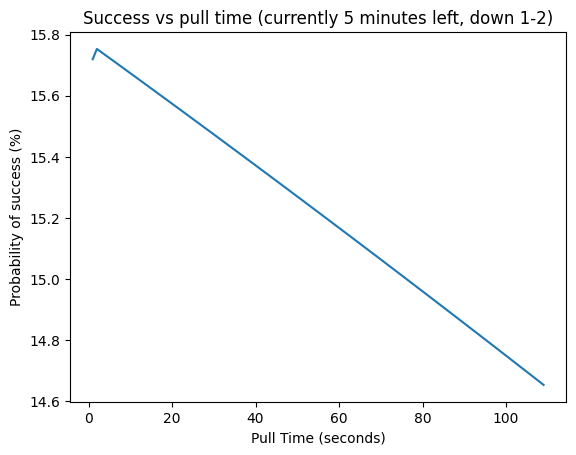

In [15]:
decisions_df = pkl.load(
    open(
        "results/partial_results_5min_1to2_brute_force.pkl",
        "rb",
    )
)

# Plot pull time vs probability of success
plt.plot(decisions_df["pull_time"], decisions_df["prob_success"])
# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title("Success vs pull time (currently 5 minutes left, down 1-2)")

# Find the pull time with the highest probability
max_prob = decisions_df["prob_success"].max()
best_pull_time = decisions_df[decisions_df["prob_success"] == max_prob][
    "pull_time"
].values[0]
display(
    f"Pull the goalie after {best_pull_time} seconds for the highest probability of success"
)

## Varying $p_{a2}$ (our probability of scoring after pulling the goalie)

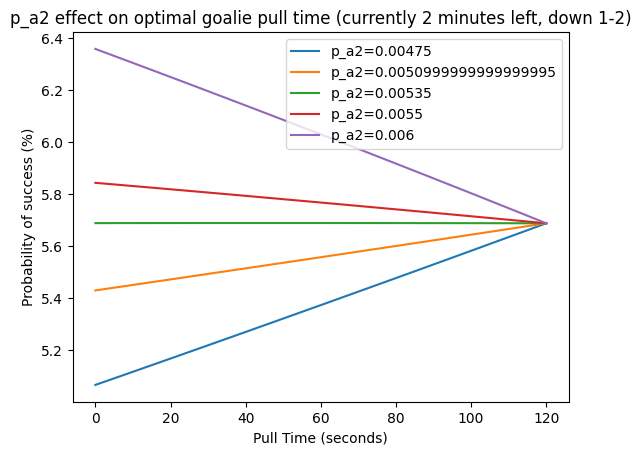

In [23]:
decisions_df = pkl.load(
    open(
        "results/down1to2_2minleft_vary-pa2.pkl",
        "rb",
    )
)

p_a2_options = decisions_df["p_a2"].unique()
for p_a2 in p_a2_options:
    decisions_df_p_a2 = decisions_df[decisions_df["p_a2"] == p_a2]
    # Plot pull time vs probability of success
    plt.plot(decisions_df_p_a2["pull_time"], decisions_df_p_a2["prob_success"], label=f"p_a2={p_a2}")

# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title("p_a2 effect on optimal goalie pull time (currently 2 minutes left, down 1-2)")
plt.legend()

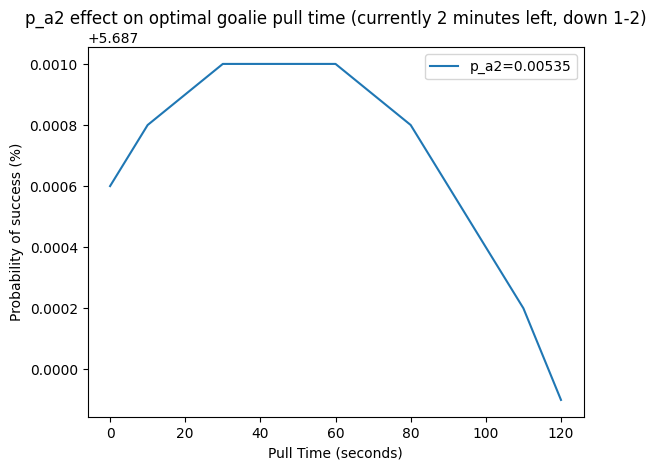

In [3]:
decisions_df = pkl.load(
    open(
        "results/down1to2_2minleft_vary-pa2.pkl",
        "rb",
    )
)
p_a2 = 5.35 * 10 ** -3
decisions_df_p_a2 = decisions_df[decisions_df["p_a2"] == p_a2]
# Plot pull time vs probability of success
plt.plot(
    decisions_df_p_a2["pull_time"],
    decisions_df_p_a2["prob_success"],
    label=f"p_a2={p_a2}",
)

# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title(
    "p_a2 effect on optimal goalie pull time (currently 2 minutes left, down 1-2)"
)
plt.legend()